### Downloading the dataset from the following link "http://cb.lk/covid_19"

In [1]:
!wget http://cb.lk/covid_19

--2021-09-16 14:07:08--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 2606:4700:3031::6815:48cb, 2606:4700:3032::ac43:bb51, 172.67.187.81, ...
Connecting to cb.lk (cb.lk)|2606:4700:3031::6815:48cb|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2021-09-16 14:07:08--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|2606:4700:3031::6815:48cb|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2021-09-16 14:07:09--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 2620:100:6019:18::a27d:412, 162.125.4.18
Connecting to www.dropbox.com (www.dropbox.com)|2620:100:6019:18::a27d:412|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidData

### Extracting Compressed Data

In [2]:
!unzip covid_19

Archive:  covid_19
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a7-4cf3-bbb6-ffe7

  inflating: CovidDataset/Train/Normal/IM-0564-0001.jpeg  
  inflating: CovidDataset/Train/Normal/NORMAL2-IM-0499-0001.jpeg  
  inflating: CovidDataset/Train/Covid/16663_1_1.jpg  
  inflating: CovidDataset/Train/Covid/extubation-8.jpg  
  inflating: CovidDataset/Train/Covid/paving.jpg  
  inflating: CovidDataset/Train/Normal/IM-0529-0001.jpeg  
  inflating: CovidDataset/Train/Normal/IM-0425-0001.jpeg  
  inflating: CovidDataset/Train/Normal/IM-0439-0001.jpeg  
  inflating: CovidDataset/Train/Normal/IM-0491-0001.jpeg  
  inflating: CovidDataset/Train/Normal/IM-0337-0001.jpeg  
  inflating: CovidDataset/Train/Covid/all14238-fig-0001-m-b.jpg  
  inflating: CovidDataset/Train/Covid/covid-19-infection-exclusive-gastrointestinal-symptoms-pa.png  
  inflating: CovidDataset/Train/Normal/NORMAL2-IM-1320-0001.jpeg  
  inflating: CovidDataset/Train/Covid/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-002-fig3b.png  
  inflating: CovidDataset/Train/Normal/NORMAL2-IM-0815-0001.jpeg  
  inflating: C

  inflating: CovidDataset/Train/Covid/figure1-5e75d0940b71e1b702629659-98-right.jpeg  
  inflating: CovidDataset/Train/Covid/03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg  
  inflating: CovidDataset/Train/Covid/ciaa199.pdf-001-c.png  
  inflating: CovidDataset/Train/Covid/extubation-4.jpg  
  inflating: CovidDataset/Train/Normal/IM-0556-0001.jpeg  
  inflating: CovidDataset/Train/Covid/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-003-fig4a.png  
  inflating: CovidDataset/Train/Covid/covid-19-pneumonia-19.jpg  
  inflating: CovidDataset/Train/Normal/IM-0392-0001.jpeg  
  inflating: CovidDataset/Train/Normal/IM-0530-0001.jpeg  
  inflating: CovidDataset/Train/Normal/IM-0261-0001.jpeg  
  inflating: CovidDataset/Train/Covid/1312A392-67A3-4EBF-9319-810CF6DA5EF6.jpeg  
  inflating: CovidDataset/Train/Normal/IM-0525-0001.jpeg  
  inflating: CovidDataset/Train/Covid/lancet-case2a.jpg  
  inflating: CovidDataset/Train/Covid/ciaa199.pdf-001-b.png  
  inflating: CovidDataset/Train/Normal/NORMAL2-I

### Setting Training Path and Validation Path

In [3]:
train_path = "/content/CovidDataset/Train"
validation_path = "/content/CovidDataset/Val"

### Importing Necessary Libraries

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix
import seaborn as sns

### Image Preprocessing


In [8]:
train_data_generator = image.ImageDataGenerator(
    rescale =1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_data_generator = image.ImageDataGenerator(
    rescale = 1./255,
)

In [9]:
train_generator = train_data_generator.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary',
)

Found 224 images belonging to 2 classes.


In [10]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [11]:
test_generator = test_data_generator.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary',
)

Found 60 images belonging to 2 classes.


### Building Convolutional Neural Network Model

In [12]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape = (224,224,3)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam', metrics = ['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [14]:
hist = model.fit(
    train_generator,
    steps_per_epoch = len(train_generator.classes)//train_generator.batch_size,
    epochs = 10,
    validation_data = test_generator,
    validation_steps = 2,
)

Epoch 1/10
7/7 [==============================] - 43s 6s/step - loss: 0.8550 - accuracy: 0.4955 - val_loss: 0.6860 - val_accuracy: 0.8500
Epoch 2/10
7/7 [==============================] - 46s 6s/step - loss: 0.6382 - accuracy: 0.6205 - val_loss: 0.6152 - val_accuracy: 0.8500
Epoch 3/10
7/7 [==============================] - 35s 5s/step - loss: 0.4910 - accuracy: 0.7545 - val_loss: 0.3730 - val_accuracy: 0.9333
Epoch 4/10
7/7 [==============================] - 33s 5s/step - loss: 0.2671 - accuracy: 0.8884 - val_loss: 0.2387 - val_accuracy: 0.9667
Epoch 5/10
7/7 [==============================] - 34s 5s/step - loss: 0.1796 - accuracy: 0.9420 - val_loss: 0.0967 - val_accuracy: 0.9833
Epoch 6/10
7/7 [==============================] - 34s 5s/step - loss: 0.1462 - accuracy: 0.9464 - val_loss: 0.0837 - val_accuracy: 0.9667
Epoch 7/10
7/7 [==============================] - 33s 5s/step - loss: 0.1402 - accuracy: 0.9598 - val_loss: 0.0593 - val_accuracy: 0.9833
Epoch 8/10
7/7 [==================

In [15]:
model.save("covid_detection.h5")

### Model Evaluation Metrics


In [16]:
model.evaluate(train_generator)

7/7 [==============================] - 13s 2s/step - loss: 0.0962 - accuracy: 0.9821


[0.09620904177427292, 0.9821428656578064]

In [17]:
model.evaluate(test_generator)

2/2 [==============================] - 3s 1s/step - loss: 0.0908 - accuracy: 0.9667


[0.09079225361347198, 0.9666666388511658]

### Loading model from saved h5 (HDF - Hierarchical Data Format)  file

In [18]:
model = load_model("covid_detection.h5")

In [19]:
y_actual = []
y_prediction = []

In [27]:
for i in os.listdir("./CovidDataset/Val/Normal/"):
    img = image.load_img("./CovidDataset/Val/Normal/"+i , target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img,axis=0)
    prediction = model.predict(img)
    y_prediction.append(int(prediction[0,0]))
    y_actual.append(1)


AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [ ]:
for i in os.listdir("./CovidDataset/Val/Covid/"):
    img = image.load_img("./CovidDataset/Val/Covid/"+i , target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img,axis=0)
    prediction = model.predict(img)
    y_prediction.append(int(prediction[0,0]))
    y_actual.append(0)


In [22]:
y_actual = np.array(y_actual)
y_prediction = np.array(y_prediction)

In [23]:
y_prediction

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [24]:
confusion_matrix = confusion_matrix(y_actual,y_prediction)

<AxesSubplot:>

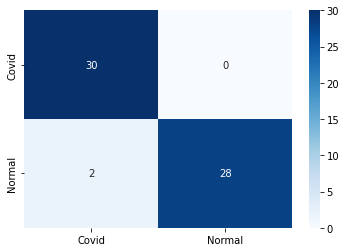

In [25]:
sns.heatmap(confusion_matrix,annot=True, xticklabels=['Covid','Normal'], yticklabels=['Covid','Normal'], cmap='Blues')

In [26]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("covid_detection.h5")